In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns=['age', 'sex', 'chest_pain', 'resting_bp', 'chol', 'fast_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'old_peak', 'slope', 'num_blood_vessels', 'thalassemia', 'target']
df= pd.read_csv("heart.csv")
df.columns=columns

In [3]:
# Check for NaN values
df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_bp                 0
chol                       0
fast_blood_sugar           0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
old_peak                   0
slope                      0
num_blood_vessels          0
thalassemia                0
target                     0
dtype: int64

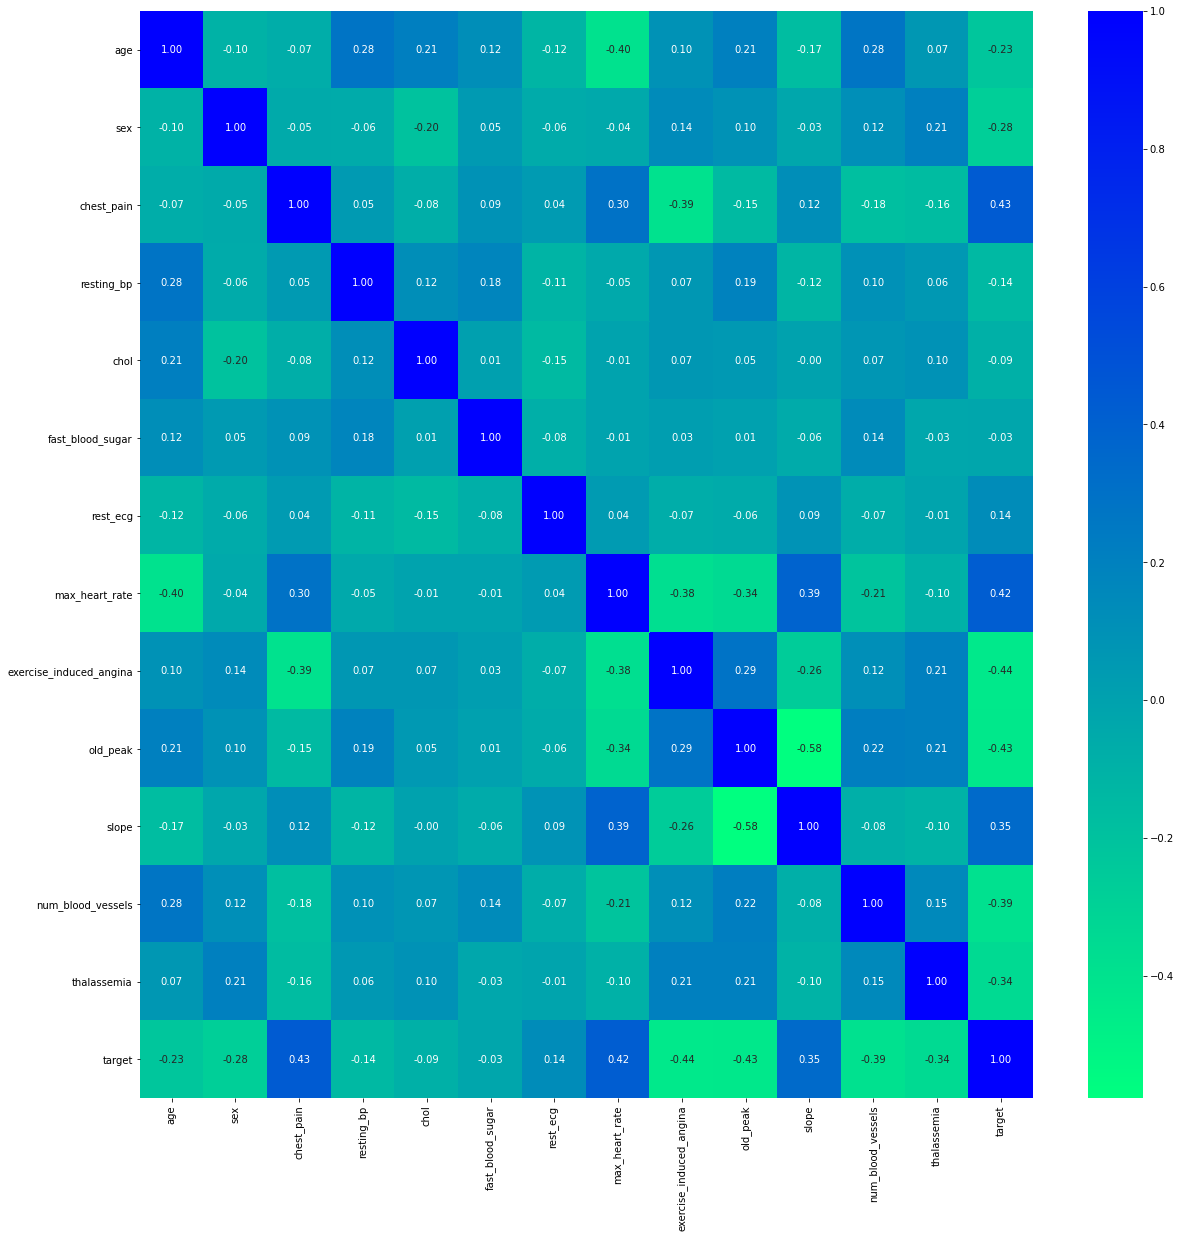

In [4]:
plt.figure(figsize=(20,20))
fig=sns.heatmap(df.corr(),annot=True, fmt='.2f',cmap='winter_r')
plt.show()

### Numerical Columns

1. age
2. resting_bp
3. chol
4. max_heart_rate
5. old_peak
6. num_blood_vessels


### Categorical Columns

1. sex  (1:Male or 0:Female)
2. chest_pain (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
3. fast_blood_sugar (> 120 mg/dl) (1: true; 0: false)
4. rest_ecg (0: normal, 1: having abnormality, 2 = showing ventricular hypertrophy)
5. slope exercise_induced_angina (1: yes, 0: no)
6. the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
7. thalassemia (a blood disorder) (3 = normal; 6 = fixed defect; 7 = reversable defect)
8. target: heart disease (0: no, 1: yes)

In [5]:
# Categorical variables(chest_pain, rest_ecg, slope, thalassemia) to dummy variables 

a = pd.get_dummies(df['chest_pain'], prefix = "chest_pain")
b = pd.get_dummies(df['rest_ecg'], prefix="rest_ecg")
c = pd.get_dummies(df['thalassemia'], prefix = "thalassemia")
d = pd.get_dummies(df['slope'], prefix = "slope")

In [6]:
frames = [df, a, b, c,d]
df = pd.concat(frames, axis = 1)
df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'chol', 'fast_blood_sugar',
       'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'old_peak',
       'slope', 'num_blood_vessels', 'thalassemia', 'target', 'chest_pain_0',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'rest_ecg_0',
       'rest_ecg_1', 'rest_ecg_2', 'thalassemia_0', 'thalassemia_1',
       'thalassemia_2', 'thalassemia_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [7]:
df.drop(columns=['thalassemia_0','thalassemia','rest_ecg','slope','chest_pain'],inplace=True)
df.rename(columns={
    'chest_pain_0':'cp_typical_angina',
    'chest_pain_1':'cp_atypical_angina',
    'chest_pain_2':'cp_non_anginal',
    'chest_pain_3':'cp_asymptomatic',
    'thalassemia_1':'thal_normal',
    'thalassemia_2':'thal_fixed_defect',
    'thalassemia_3':'thal_reversable_defect',
    'slope_0':'upsloping',
    'slope_1':'flat',
    'slope_2':'downsampling',
    'rest_ecg_0':'ecg_normal',
    'rest_ecg_1':'ecg_abnormal',
    'rest_ecg_2':'ecg_hypertrophy'
},inplace=True)

In [8]:
df

,age,sex,resting_bp,chol,fast_blood_sugar,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,target,...,cp_asymptomatic,ecg_normal,ecg_abnormal,ecg_hypertrophy,thal_normal,thal_fixed_defect,thal_reversable_defect,upsloping,flat,downsampling
0,63,1,145,233,1,150,0,2.3,0,1,...,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,0,1,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,2,0,...,0,0,1,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,1,0,0,0,1,0,1,0


In [9]:
df

,age,sex,resting_bp,chol,fast_blood_sugar,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,target,...,cp_asymptomatic,ecg_normal,ecg_abnormal,ecg_hypertrophy,thal_normal,thal_fixed_defect,thal_reversable_defect,upsloping,flat,downsampling
0,63,1,145,233,1,150,0,2.3,0,1,...,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,0,1,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,2,0,...,0,0,1,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,1,0,0,0,1,0,1,0


In [10]:
df.describe()

,age,sex,resting_bp,chol,fast_blood_sugar,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,target,...,cp_asymptomatic,ecg_normal,ecg_abnormal,ecg_hypertrophy,thal_normal,thal_fixed_defect,thal_reversable_defect,upsloping,flat,downsampling
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,0.544554,...,0.075908,0.485149,0.501650,0.013201,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.498835,...,0.265288,0.500606,0.500824,0.114325,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


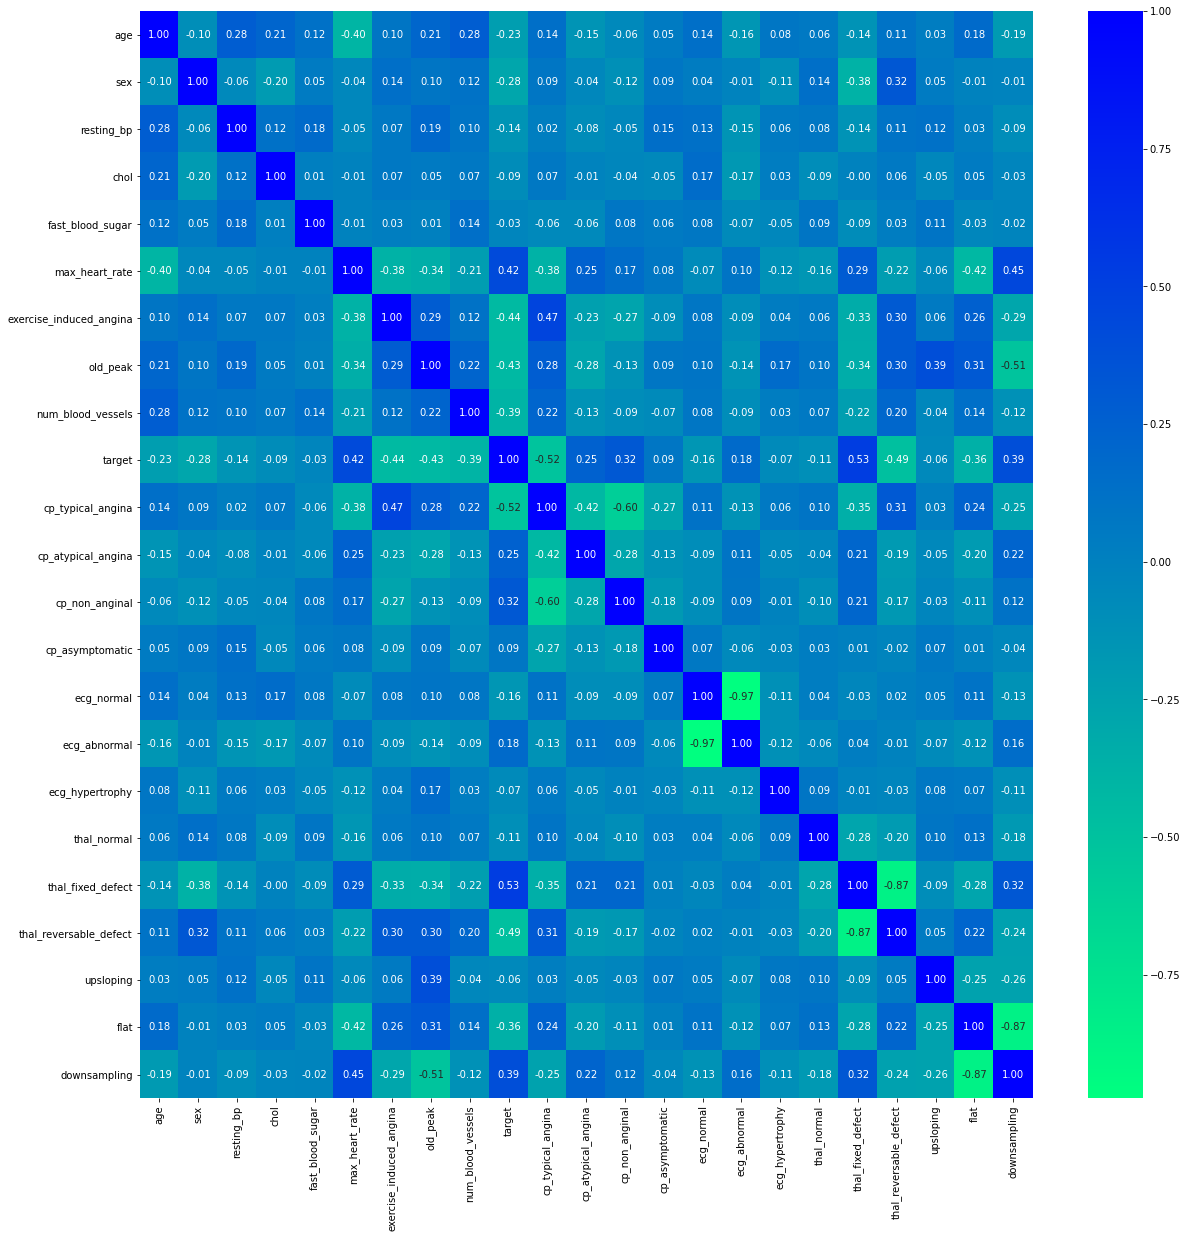

In [11]:
plt.figure(figsize=(20,20))
fig=sns.heatmap(df.corr(),annot=True, fmt='.2f',cmap='winter_r')
plt.show()

In [12]:
df_col=df.loc[:, (df.corr()['target'] > 0.3) | (df.corr()['target'] < -0.3)].columns
# df.loc[:, df.corr()['target'] < -0.4].columns

In [13]:
new_df = df[df_col]
y=df['target']

In [14]:
# # ignoring divide error and pair plotting
# with np.errstate(divide='ignore',invalid='ignore'):
#     sns.pairplot(df, hue="None", palette="husl")
# plt.show()

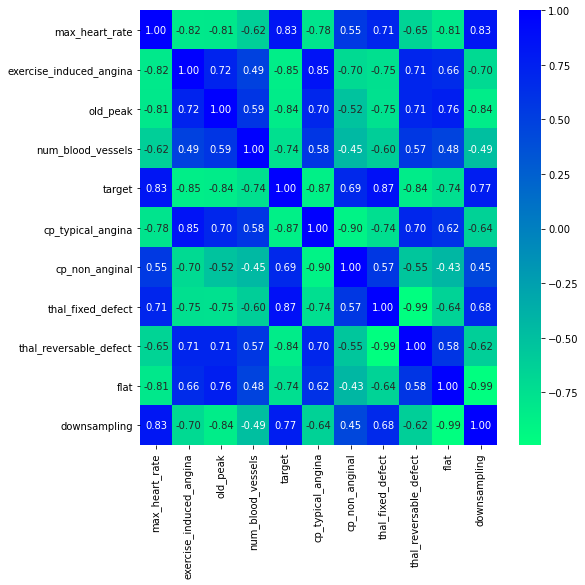

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df[df_col].corr().corr(),annot=True, fmt='.2f',cmap='winter_r')
plt.show()

### Variables that are highly correlated(positively/negatively) with the target

In [16]:
new_df.drop(columns=['target'],inplace=True)
new_df

/home/jkarki/.local/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,cp_typical_angina,cp_non_anginal,thal_fixed_defect,thal_reversable_defect,flat,downsampling
0,150,0,2.3,0,0,0,0,0,0,0
1,187,0,3.5,0,0,1,1,0,0,0
2,172,0,1.4,0,0,0,1,0,0,1
3,178,0,0.8,0,0,0,1,0,0,1
4,163,1,0.6,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
298,123,1,0.2,0,1,0,0,1,1,0
299,132,0,1.2,0,0,0,0,1,1,0
300,141,0,3.4,2,1,0,0,1,1,0
301,115,1,1.2,1,1,0,0,1,1,0


### EDA

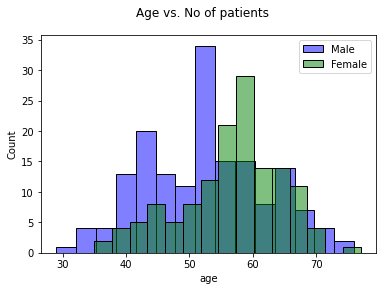

In [17]:
fig, ax = plt.subplots()

sns.histplot(data=df[df['target']==1], x="age", bins= 15, alpha=0.5, color="blue", label="Male")
sns.histplot(data=df[df['target']==0], x="age", bins= 15, alpha=0.5, color="green", label="Female")
fig.suptitle("Age vs. No of patients")
ax.legend()

plt.show()

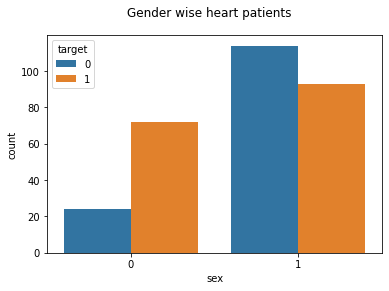

In [18]:
fig, ax = plt.subplots()
sns.countplot(x='sex', hue="target", data=df)
fig.suptitle("Gender wise heart patients")

plt.show()

In [19]:
df

,age,sex,resting_bp,chol,fast_blood_sugar,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,target,...,cp_asymptomatic,ecg_normal,ecg_abnormal,ecg_hypertrophy,thal_normal,thal_fixed_defect,thal_reversable_defect,upsloping,flat,downsampling
0,63,1,145,233,1,150,0,2.3,0,1,...,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,0,1,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,2,0,...,0,0,1,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,1,0,0,0,1,0,1,0


In [41]:
df.to_csv('heart_processed.csv')

In [20]:
df.drop(columns=['target'],inplace=True)

### Normalize

In [21]:
# Normalization
# X = (df - np.min(df)) / (np.max(df) - np.min(df)).values
X = (new_df - np.min(new_df)) / (np.max(new_df) - np.min(new_df)).values

In [22]:
X

,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,cp_typical_angina,cp_non_anginal,thal_fixed_defect,thal_reversable_defect,flat,downsampling
0,0.603053,0.0,0.370968,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885496,0.0,0.564516,0.00,0.0,1.0,1.0,0.0,0.0,0.0
2,0.770992,0.0,0.225806,0.00,0.0,0.0,1.0,0.0,0.0,1.0
3,0.816794,0.0,0.129032,0.00,0.0,0.0,1.0,0.0,0.0,1.0
4,0.702290,1.0,0.096774,0.00,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
298,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,1.0,1.0,0.0
299,0.465649,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,1.0,0.0
300,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,1.0,1.0,0.0
301,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,1.0,1.0,0.0


### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

### Baseline Model Selection

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

svc=SVC(kernel= 'rbf', gamma = 'scale' ,random_state=42)
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)

# storing recall_score for later comparision
svm_recall = round(recall_score(y_test,svm_pred,average='weighted'),3)

print (classification_report(y_test, svm_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
acc = accuracy_score(y_test, svm_pred)
print ("Accuracy: %.3f" % acc)

              precision    recall  f1-score   support

           0      0.920     0.852     0.885        27
           1      0.889     0.941     0.914        34

    accuracy                          0.902        61
   macro avg      0.904     0.897     0.899        61
weighted avg      0.903     0.902     0.901        61

Accuracy: 0.902


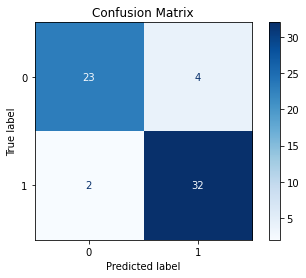

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, X_test, y_test,
                             cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

gamma = 0.01  accuracy = 0.89   AUC = 0.92
gamma = 0.1  accuracy = 0.89   AUC = 0.93
gamma = 0.2  accuracy = 0.89   AUC = 0.93
gamma = 1  accuracy = 0.89   AUC = 0.95
gamma = scale  accuracy = 0.90   AUC = 0.94
gamma = auto  accuracy = 0.89   AUC = 0.93


<ipython-input-27-7b2faa4d1ab5>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


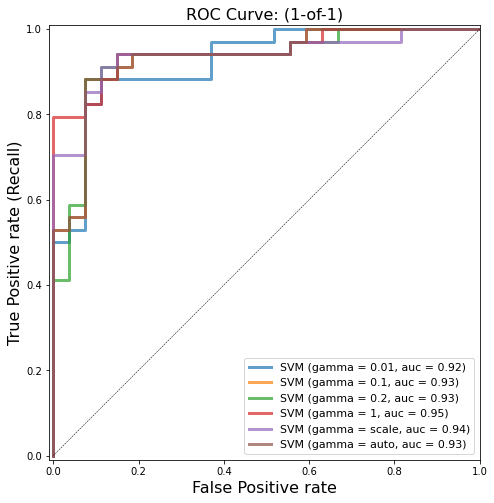

In [27]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (15,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1, 'scale', 'auto']:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {}, auc = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC Curve: (1-of-1)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

              precision    recall  f1-score   support

           0      0.885     0.852     0.868        27
           1      0.886     0.912     0.899        34

    accuracy                          0.885        61
   macro avg      0.885     0.882     0.883        61
weighted avg      0.885     0.885     0.885        61

Accuracy: 0.885


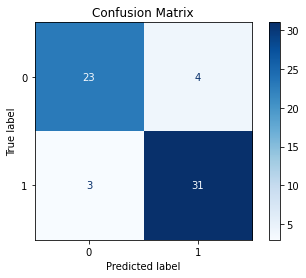

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

log_recall = round(recall_score(y_test,log_pred,average='weighted'),3)

print (classification_report(y_test, log_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, log_pred))

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(log_reg, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0      0.828     0.889     0.857        27
           1      0.906     0.853     0.879        34

    accuracy                          0.869        61
   macro avg      0.867     0.871     0.868        61
weighted avg      0.871     0.869     0.869        61

Accuracy: 0.869


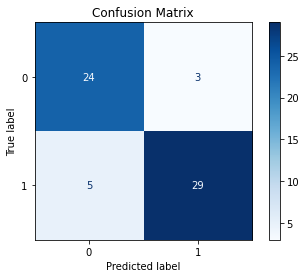

In [29]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)

nb_recall = round(recall_score(y_test,nb_pred,average='weighted'),3)

print (classification_report(y_test, nb_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, nb_pred))

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(nb, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0      0.800     0.889     0.842        27
           1      0.903     0.824     0.862        34

    accuracy                          0.852        61
   macro avg      0.852     0.856     0.852        61
weighted avg      0.858     0.852     0.853        61

Accuracy: 0.852


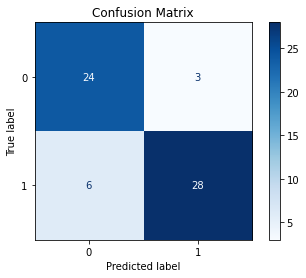

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,metric='minkowski')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# storing recall_score for later comparision
knn_recall = round(recall_score(y_test,knn_pred,average='weighted'),3)

print (classification_report(y_test, knn_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, knn_pred))

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

[12:26:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jkarki/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



accuracy_score on train dataset :  1.0
              precision    recall  f1-score   support

           0      0.815     0.815     0.815        27
           1      0.853     0.853     0.853        34

    accuracy                          0.836        61
   macro avg      0.834     0.834     0.834        61
weighted avg      0.836     0.836     0.836        61



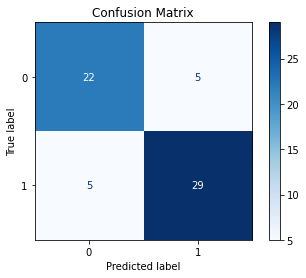

In [31]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

model = XGBClassifier()
 
# fit the model with the training data
model.fit(X_train,y_train)
 
# Accuray Score on train dataset
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(X_test)

xgb_recall = round(recall_score(y_test, predict_test, average='weighted'),3)

print (classification_report(y_test, predict_test, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)

# confusion matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [32]:
len(X_test)

61

## Deep Learning ANN

In [33]:
# Normalization
# X = (df - np.min(df)) / (np.max(df) - np.min(df)).values

In [34]:
X_test.shape

(61, 10)

In [35]:
X

,max_heart_rate,exercise_induced_angina,old_peak,num_blood_vessels,cp_typical_angina,cp_non_anginal,thal_fixed_defect,thal_reversable_defect,flat,downsampling
0,0.603053,0.0,0.370968,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885496,0.0,0.564516,0.00,0.0,1.0,1.0,0.0,0.0,0.0
2,0.770992,0.0,0.225806,0.00,0.0,0.0,1.0,0.0,0.0,1.0
3,0.816794,0.0,0.129032,0.00,0.0,0.0,1.0,0.0,0.0,1.0
4,0.702290,1.0,0.096774,0.00,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
298,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,1.0,1.0,0.0
299,0.465649,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,1.0,0.0
300,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,1.0,1.0,0.0
301,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,1.0,1.0,0.0


In [36]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(30,input_dim=(X_test.shape[1]),activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 1ms/step - loss: 0.6603 - accuracy: 0.6304
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.7789
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7893
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8176
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4728 - accuracy: 0.8023
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.8142
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8220
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.8375
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.8032
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8171
Epoch 11/50
8/8 [======================

In [38]:
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.8524590134620667
